<a href="https://colab.research.google.com/github/alharuty/Proyecto-EDA-MiniDathaton/blob/main/Proyecto_IV_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto de EDA he decidido hacer un estudio sobre el mercado laboral del sector tecnológico en España.

Para ello he utilizado mi aplicación scraper que scrapea la página de Infojobs según la palabra ingresada. Por eso, he decidio seleccionar los sectores tecnológicos más comunes y trabajar sobre esa base de datos.

Los términos de búsqueda han sido:

1. Full Stack
2. Frontend
3. Backend
4. Data Scients
5. Data Engineer
6. Inteligencia Artificial
7. Azure Cloud
8. AWS cloud
9. Especialista en Ciberseguridad
10. Machine Learning
11. Hardware Engineer

Con estos términos de búsqueda he recopilado 2586 ofertas de trabajo y los he guardado en un archivo llamado job_offers_rows.csv para su posterior estudio.




**PASO 1: CARGAMOS NUESTRO ARCHIVO CON LA BASE DE DATOS:**

In [170]:
# importamos librerías
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
# cargamos nuestro archivo
df = pd.read_csv("job_offers_rows.csv")

**PASO 2: IMPRIMIMOS INFORMACIÓN SOBRE NUESTRA BASE DE DATOS PARA CONOCERLO**


In [171]:
print("-----INFORMACIÓN GENERAL---------")
# ver información general
df.info()
print("-----VER SI TENEMOS VALORES NULOS----")
# ver si tenemos valores nulos
print(df.isnull().sum())
print("------VER ESTADÍSTICAS BÁSICAS-------")
# ver estadísticas básicas
df.describe(include='all')

-----INFORMACIÓN GENERAL---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2586 non-null   int64 
 1   title          2586 non-null   object
 2   company        2586 non-null   object
 3   company_url    2586 non-null   object
 4   location       2586 non-null   object
 5   salary         2586 non-null   object
 6   work_mode      2586 non-null   object
 7   contract_type  2586 non-null   object
 8   workday        2586 non-null   object
 9   search_date    2586 non-null   object
 10  search_term    2586 non-null   object
dtypes: int64(1), object(10)
memory usage: 222.4+ KB
-----VER SI TENEMOS VALORES NULOS----
id               0
title            0
company          0
company_url      0
location         0
salary           0
work_mode        0
contract_type    0
workday          0
search_date      0
search_term      0


,id,title,company,company_url,location,salary,work_mode,contract_type,workday,search_date,search_term
count,2586.000000,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586
unique,NaN,1566,753,738,225,247,46,8,8,2586,12
top,NaN,Data Engineer,knowmad Mood,https://at-sistemas.ofertas-trabajo.infojobs.net/,Madrid,No disponible,Híbrido,Contrato indefinido,Jornada completa,2025-03-29 17:54:05.368585,Backend
freq,NaN,17,74,74,1162,1561,1187,2371,2415,1,510
mean,3482.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,746.658222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2190.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2836.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3482.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4128.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**PASO 3: LIMPIEZA DE DATOS**

**PASO 3.1: LIMPIEZA DE LA COLUMNA SALARY**<br>
Debido a que la tabla original tiene una columna llamada "salary", y que los salarios están representados en tipo string, he decidido crear una función para la limpieza de esa columna:
1. Convertir los string en int
2. Hacer una media del rango del salario
3. Cambiar el "No disponible" por NaN

Así será más fácil manejar los salarios.

In [174]:
import re
import numpy as np

# función para convertir y limpiar la columna salary
def clean_salary(s):
    if "No disponible" in s:
        return np.nan # cambiamos "No disponible" por nan

    # quitamos los puntos del salario, y creamos un "diccionario" del rango de salario
    salary = re.findall(r'\d{2,}', s.replace(".", "").replace(",", ""))
    # lo convertimos en int
    salary = [int(n) for n in salary]

    # si nos encontramos con rango, devolvemos su media
    if len(salary) == 2:
        return np.mean(salary)
    # si no es rango, devolvemos el propio salario
    else:
        return salary[0]

# creamos una nueva columna desde [salary] usando la función clean_salary
df["salary_clean"] = df["salary"].apply(clean_salary)


In [175]:
# imprimimos la tabla para ver los cambios, veremos que se ha añadido una nueva columna llamada "salary_clean"
df.head(5)

,id,title,company,company_url,location,salary,work_mode,contract_type,workday,search_date,search_term,salary_clean
0,2190,Desarrollador/a full stack .NET + React (100% ...,knowmad Mood,https://at-sistemas.ofertas-trabajo.infojobs.net/,Madrid,No disponible,Solo teletrabajo,Contrato indefinido,Jornada completa,2025-03-29 09:08:34.572339,Full stack,NaN
1,2191,Desarrollador/a Full Stack PHP + JavaScript (N...,CLICKITPOINT,https://www.infojobs.net/clickitpoint/em-i6656...,Madrid,30.000 € - 36.000 € Bruto/año,Solo teletrabajo,Contrato indefinido,Jornada completa,2025-03-29 09:08:34.700971,Full stack,33000.0
2,2192,Programador/a Full Stack Typescript/Javascript...,TraffGen,https://www.infojobs.net/traffgen/em-i98555051...,San Roque,50.000 € - 60.000 € Bruto/año,Solo teletrabajo,Contrato indefinido,Jornada completa,2025-03-29 09:08:34.796968,Full stack,55000.0
3,2193,Lead Full-Stack Senior React - Ingeniero/a des...,TRBL Services,https://www.infojobs.net/trbl-services/em-i985...,Madrid,Más de 30.000 €,Híbrido,Contrato indefinido,Jornada completa,2025-03-29 09:08:34.914857,Full stack,30000.0
4,2194,Programador/a Full Stack Java Angular - Remoto,METRICA CONSULTING,https://metrica.ofertas-trabajo.infojobs.net/,Málaga,30.000 € - 36.000 € Bruto/año,Solo teletrabajo,Contrato indefinido,Jornada completa,2025-03-29 09:08:35.039909,Full stack,33000.0


**PASO 3.2: LIMPIEZA DE DUPLICADOS**<br>
Viendo las estadísticas básicas, me he dado cuenta que de las 2586 ofertas(title) sólo 1566 son únicos. *Esto es un fallo del scraper, porque no elimina las ofertas duplicadas.*

Pero tras estudiar la tabla, he tenido en cuenta que puede que haya un mísmo título pero que sea diferente oferta de trabajo, diferente empresa, diferente jornada laboral, etc.

Por ejemplo:<br>
Data engineer | Empresa 1 | Madrid | 30000€<br>
Data engineer | Empresa 2 | Barcelona | 32000€

Vemos que hay un mísmo título pero son 2 ofertas diferentes, teniendo en cuenta esto, la cifra de duplicados baja porque puede que por algún casual haya 2 ofertas con el mismo nombre, porque estos no son unique.

Para ello, he decidido buscar los duplicados que tengan todas las columnas iguales:

Por ejemplo:<br>
Data engineer | Empresa 1 | Madrid | 30000€<br>
Data engineer | Empresa 1 | Madrid | 30000€

En este caso vamos a limpiar la tabla, dejando solo la primera coincidencia.

In [176]:
# Ver cuántos duplicados existen
duplicated = df.duplicated(subset=['title', 'company', 'company_url', 'location', 'salary', 'work_mode', 'contract_type', 'workday', 'search_term', 'salary_clean'], keep=False).sum()
print(f'Tenemos {duplicated} duplicados')

Tenemos 271 duplicados


In [177]:
# eliminamos duplicados guardando en una nueva tabla
cleaned_duplicates = df.drop_duplicates(subset=['title', 'company', 'company_url', 'location', 'salary', 'work_mode', 'contract_type', 'workday', 'search_term', 'salary_clean'], keep='first')

# Verificar el número de filas después de eliminar los duplicados
print(f"Filas antes de la limpieza: {len(df)}")
print(f"Filas después de la limpieza: {len(cleaned_duplicates)}")

Filas antes de la limpieza: 2586
Filas después de la limpieza: 2440


**PASO 4: LIMPIAMOS Y CREAMOS NUEVA TABLA**<br>

Ahora que hemos limpiado los salarios y los duplicados, vamos a crear una nueva tabla llamada new_db, sobre la que trabajaremos

In [178]:
# creamos una nueva tabla con las columnas que queremos
new_db = cleaned_duplicates[["search_term", "location", "salary_clean", "work_mode", "contract_type", "workday", 'company']].copy()
# cambiamos los nombres de las columnas de la nueva tabla
new_db.columns = ["Puesto de trabajo", "Ciudad", "Salario", "Forma de trabajo", "Tipo de contrato", "Tipo de jornada", 'Empresa']

# mejoramos la vista previa del salario
new_db["Salario"] = new_db["Salario"].apply(lambda x: f"{int(x):,}".replace(",", ".") if x == x else np.nan)  # x == x es una forma de verificar que no sea NaN

# lo guardamos en un nuevo archivo csv
new_db.to_csv("job_offers_cleaned.csv", index=False)

Ahora la tabla queda así: ⬇

In [179]:
# tabla limpia y lista para usar
new_db.head(10)

,Puesto de trabajo,Ciudad,Salario,Forma de trabajo,Tipo de contrato,Tipo de jornada,Empresa
0,Full stack,Madrid,NaN,Solo teletrabajo,Contrato indefinido,Jornada completa,knowmad Mood
1,Full stack,Madrid,33.000,Solo teletrabajo,Contrato indefinido,Jornada completa,CLICKITPOINT
2,Full stack,San Roque,55.000,Solo teletrabajo,Contrato indefinido,Jornada completa,TraffGen
3,Full stack,Madrid,30.000,Híbrido,Contrato indefinido,Jornada completa,TRBL Services
4,Full stack,Málaga,33.000,Solo teletrabajo,Contrato indefinido,Jornada completa,METRICA CONSULTING
5,Full stack,Madrid,NaN,Híbrido,Contrato indefinido,Jornada completa,SEREM Consultoría Empresarial
6,Full stack,Madrid,NaN,Solo teletrabajo,Contrato indefinido,Jornada completa,EIKONDATA
7,Full stack,Las Palmas de Gran Canaria,21.500,Presencial,Contrato indefinido,Jornada completa,GRUPO MIGUEL LEON SOCIEDAD LIMITADA.
8,Full stack,Madrid,NaN,Híbrido,Contrato indefinido,Jornada completa,Luca TIC
9,Full stack,Madrid,34.500,Híbrido,Contrato de duración determinada,Jornada completa,Abalia


**GRÁFICO 1: DIAGRAMA DE BARRAS PARA SABER CUÁLES SON LOS PUESTOS MÁS DEMANDADOS**

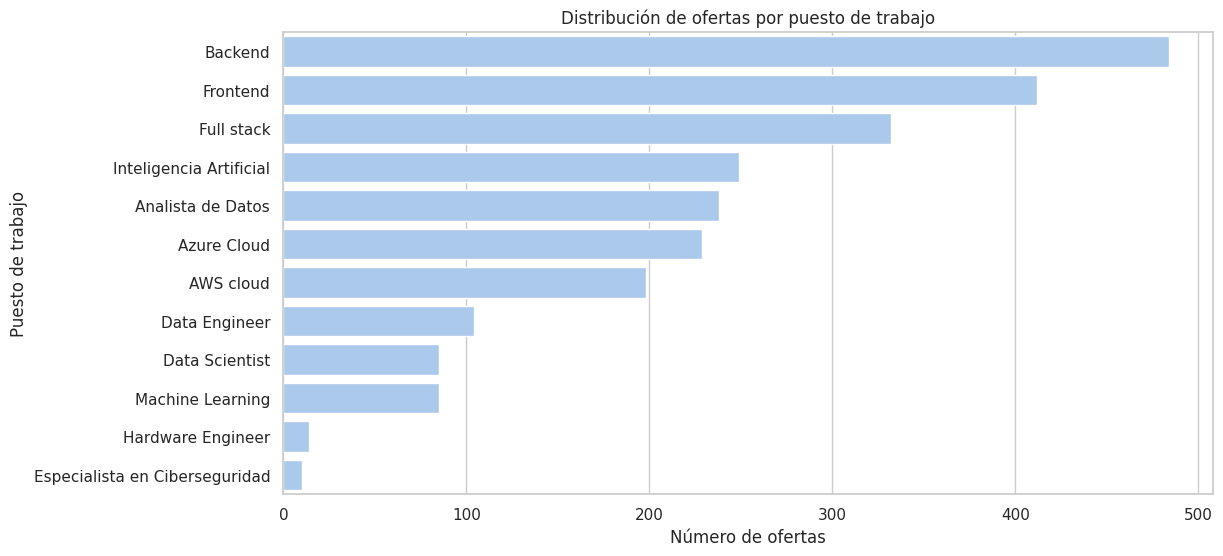

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=new_db["Puesto de trabajo"], order=new_db["Puesto de trabajo"].value_counts().index)
plt.xlabel("Número de ofertas")
plt.ylabel("Puesto de trabajo")
plt.title("Distribución de ofertas por puesto de trabajo")
plt.show()


**GRÁFICO 2: DIAGRAMA DE BARRAS PARA SABER EL SUELDO MEDIO SEGÚN PUESTO**

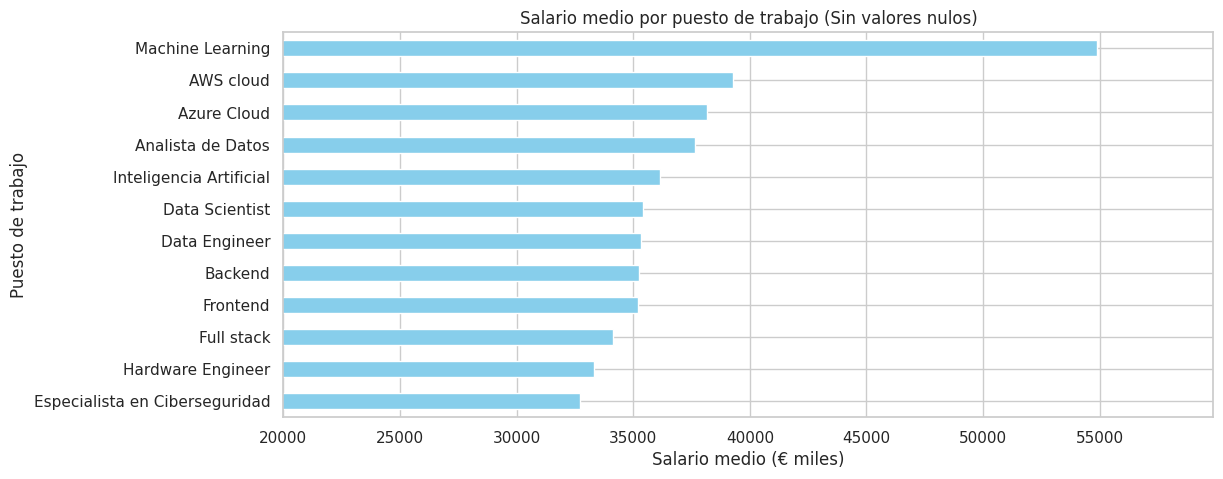

In [181]:
# convertimos la columna a tipo numérico
new_db["Salario"] = pd.to_numeric(new_db["Salario"])

# reemplazamos NaN con la mediana de la columna
new_db["Salario"] = new_db["Salario"].fillna(new_db["Salario"].median())

# agrupamos por "Puesto de trabajo" y calculamos el salario medio
df_salary = new_db.groupby("Puesto de trabajo")["Salario"].mean().sort_values()

# multiplicamos por 1000
df_salary = df_salary * 1000

# creamos el gráfico
plt.figure(figsize=(12, 5))
df_salary.plot(kind="barh", color="skyblue")
plt.xlim(20000, (df_salary.max()+ 5000))
plt.xlabel("Salario medio (€ miles)")
plt.ylabel("Puesto de trabajo")
plt.title("Salario medio por puesto de trabajo (Sin valores nulos)")
plt.show()


**PASO 4: USAR GEONAMES PARA CREAR UN MAPA DE CALOR**<br>

Para una mejor visión de las ciudades con más ofertas de trabajo se me ha ocurrido usar un mapa de calor.

4. 1: Para conseguir el mapa de calor, se necesita tener las coordenadas de las ciudades para visualizarlos en el mapa. Asíque lo primero que he hecho es listar todas las ciudades que aparecen en mi columna "Ciudad".

In [151]:
# listamos todas las ciudades únicos que tenemos
ciudades_unicas = new_db['Ciudad'].unique()
# podemos imprimirlas para visualizar
print(ciudades_unicas)

['Madrid' 'San Roque' 'Málaga' 'Las Palmas de Gran Canaria' 'Lleida'
 'Barcelona' 'Alcalá de Guadaíra' 'Aranguren' 'Albacete' 'Tarragona'
 'Nigrán' 'Egüés' 'Puerto del Rosario' 'Santander' 'Zaragoza'
 'Cornellà de Llobregat' 'Gijón' 'Valladolid' 'Benicasim/Benicàssim'
 'Las Rozas de Madrid' 'Banyoles' 'Villanueva del Pardillo'
 'Donostia-San Sebastián' 'Sevilla' 'Montmeló' 'Tomelloso' 'Valencia'
 'Alicante/Alacant' 'Sant Feliu de Llobregat' 'Pamplona/Iruña'
 'Molins de Rei' 'Almussafes' 'Balaguer' 'Pamplona' 'Torrelavega'
 'Alberic' 'Manzanares El Real' 'Rubí' 'Santa Maria de Palautordera'
 'Pozuelo de Alarcón' 'Girona' 'Utebo' 'Cerdanyola del Vallès'
 'Torrejón de Ardoz' "L'Hospitalet de Llobregat" 'Sant Cugat del Vallès'
 'Murcia' 'Burlada/Burlata' 'Badalona' 'San Agustín del Guadalix'
 'A Coruña' 'Getafe' 'Viveiro' 'Mataró' 'Logroño' 'Castelldefels'
 'Solo teletrabajo' 'Granada' 'Alcobendas' 'Palma de Mallorca' 'Bilbao'
 'San Fernando' 'Gandia' 'Vic' 'Canovelles' 'España' 'Lliçà de 

4. 2: Ahora que tenemos las ciudades necesitamos saber sus coordenadas para poder pintarlos en el mapa. Para esto usaremos la API de geonames.org y guardaremos las coordenadas de cada ciudad en un archivo llamado location_coordinates.csv

In [ ]:
!pip install requests

import requests
import pandas as pd

USERNAME = 'alharu'

cities = ciudades_unicas

def get_coordinates(city):
    url = f'http://api.geonames.org/searchJSON?q={city}&maxRows=1&username={USERNAME}'
    response = requests.get(url)
    data = response.json()

    if 'geonames' in data and len(data['geonames']) > 0:
        lat = data['geonames'][0]['lat']
        lng = data['geonames'][0]['lng']
        return lat, lng
    else:
        return None, None

coordinates = []

for city in cities:
    lat, lng = get_coordinates(city)
    if lat is not None and lng is not None:
        coordinates.append([city, lat, lng])
    else:
        coordinates.append([city, None, None])

# creamos un DataFrame con los datos recopilados
df_coordinates = pd.DataFrame(coordinates, columns=["Ciudad", "Latitud", "Longitud"])

# guardamos el DataFrame en un archivo CSV
output_file = 'location_coordinates.csv'
df_coordinates.to_csv(output_file, index=False)

# imprimimos mensaje para saber que se creó el archivo de forma correcta
print(f"El archivo ha sido guardado como {output_file}")


**GRÁFICO 3: MAPA DE CALOR DE CIUDADES CON MÁS OFERTAS LABORALES DISPONIBLES**

In [59]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# contamos la cantidad de trabajos por ciudad en new_db
city_counts = new_db['Ciudad'].value_counts().reset_index()
city_counts.columns = ['Ciudad', 'Cantidad de Trabajos']

# cargamos las coordenadas de las ciudades desde location_coordinates.csv
location_df = pd.read_csv("location_coordinates.csv")

# unimos la información de cantidad de trabajos con las coordenadas
merged_df = pd.merge(city_counts, location_df, on='Ciudad', how='left')

# ceamos la lista de coordenadas y la cantidad de trabajos
heat_data = []

for index, row in merged_df.iterrows():
    lat = row['Latitud']
    lon = row['Longitud']
    count = row['Cantidad de Trabajos']

    # Añadimos a la lista de coordenadas para el mapa de calor
    if pd.notna(lat) and pd.notna(lon):  # Verificamos que las coordenadas no sean NaN
        heat_data.append([lat, lon, count])

# creamos un mapa base centrado en España
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='cartodb positron')

# añadimos la capa de mapa de calor
HeatMap(heat_data).add_to(m)

# visualizamos el mapa directamente en Jupyter
m


**GRÁFICO 4: MODA DE FORMA DE TRABAJO**

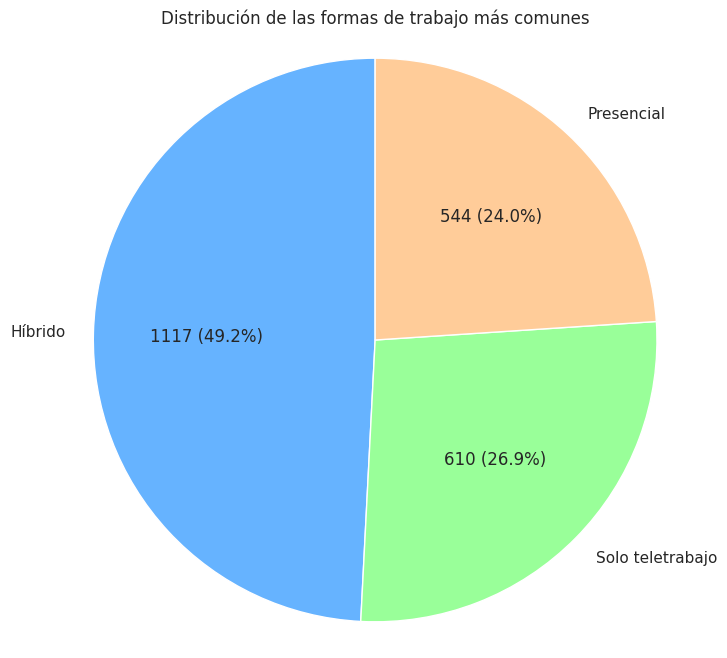

In [182]:
# limpiamos los datos para tener solo las formas de trabajo válidas
formas_validas = ['Solo teletrabajo', 'Híbrido', 'Presencial']
new_db_filtrado = new_db[new_db['Forma de trabajo'].isin(formas_validas)]

# contar cuántos registros hay para cada forma de trabajo
conteo_formas_trabajo = new_db_filtrado['Forma de trabajo'].value_counts()

import matplotlib.pyplot as plt

# creamos gráfico de pastel
plt.figure(figsize=(8, 8))

# función para mostrar tanto el porcentaje como el conteo
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # calcular el porentaje
    return f"{absolute} ({pct:.1f}%)"  # devolvemos "conteo (porcentaje%)"

# creamos gráfico circular con etiquetas personalizadas
plt.pie(conteo_formas_trabajo,
        labels=conteo_formas_trabajo.index,
        autopct=lambda pct: func(pct, conteo_formas_trabajo),
        startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99'])

plt.title('Distribución de las formas de trabajo más comunes')

# mostramos el gráfico
plt.axis('equal')  # para que el gráfico se muestre como un círculo
plt.show()


**GRÁFICO 5: TOP 10 EMPRESAS CON MÁS OFERTAS**

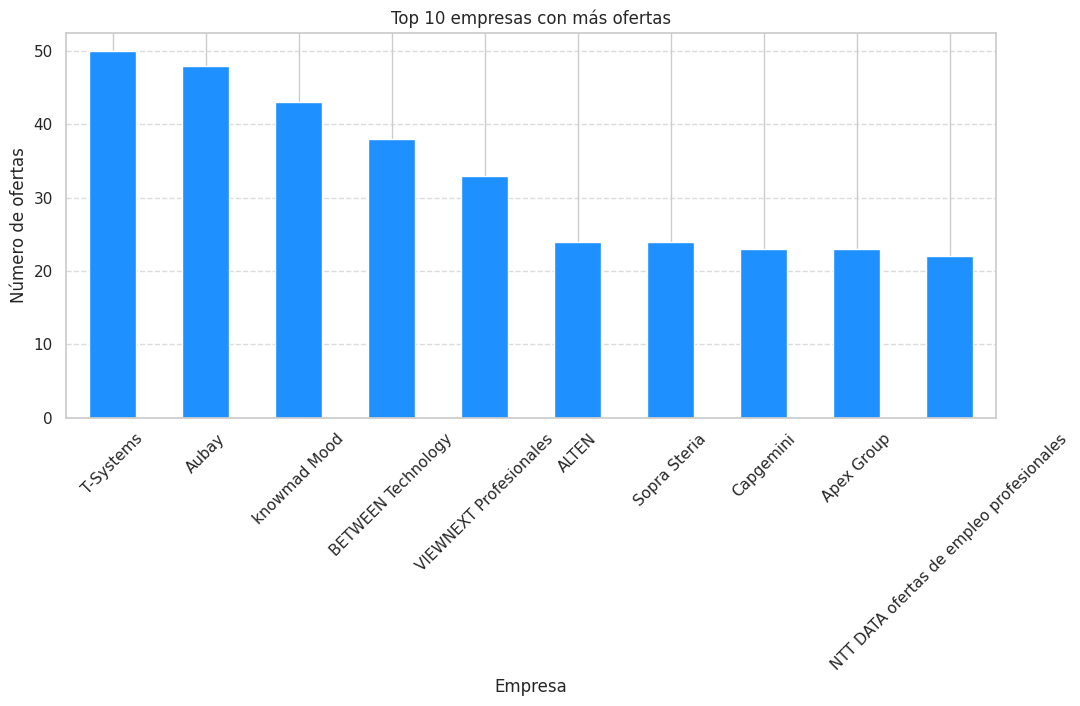

In [183]:
df_top_companies = new_db["Empresa"].value_counts().head(10)

plt.figure(figsize=(12,5))
df_top_companies.plot(kind="bar", color="dodgerblue")
plt.ylabel("Número de ofertas")
plt.xlabel("Empresa")
plt.title("Top 10 empresas con más ofertas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
